## 라이브러리 임포트
- 실습에 필요한 라이브러리를 임포트.

In [1]:
import numpy as np
import pandas as pd

#sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

 ## 문제 정의
- 서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류해보는 예제.

## 데이터 수집
- 아래는 서울의 대표적인 구(district) 위치 데이터
- 구(district) 정보는 학습에 사용함.


### 컬럼 주석
- district : 행정 구 (서초구, 송파구, 용산구 등) 서울의 단위 지역 분류값
- dong : 구(district)보다 작은 단위의 행정구역
- latitude : 위도
- longitude : 경도
- label : 한강을 기준으로 동/서/남/북으로 구분한 지역의 명칭

In [2]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


- 아래는 서울의 대표적인 동 위치 데이터
- 동정보는 테스트시 사용하기

In [3]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [4]:
# 현재가지고 있는 데이터에서 레이블 갯수 확인

train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [5]:
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

## 데이터 전처리
- 이번 예제에서는 위도정보와 경도정보만으로 그 지역의 레이블(타겟)을 예측해 볼 수 있도록 데이터 전처리를 함.
- 각 feature별 특징중 경도와 위도의 평균값과 편차를 보도록 함.

In [6]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


- 경도와 위도는 같은 단위를 사용하는 것을 확인
- 이번 예제는 의사결정트리로 데이터를 분류 적용
- 의사결정트리는 각 특징을 독립적으로 사용하기 때문에, 이번 예제에서는 별다른 전처리과정이 필요가 없다.

In [7]:
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


## 데이터 시각화
- 데이터 특징을 바탕으로 한 공간에 데이터특징을 시각화 함으로써 우리는 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있고, 데이터의 패턴을 눈으로 쉽게 파악할 수 있음.

Text(0.5, 1.0, 'district visualization in 2d plane')

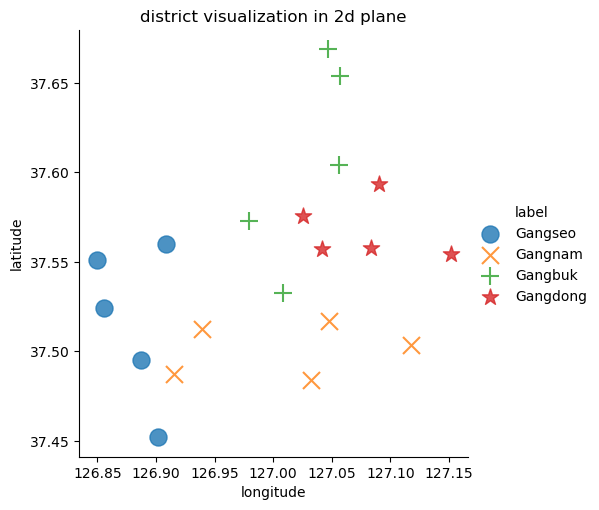

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 경도, 위도에 따른 데이터 시각화
sns.lmplot(data = train_df, x = 'longitude', y = 'latitude', scatter_kws = {'s':150},
          markers=['o', 'x', '+', '*'], hue = 'label', fit_reg = False)

plt.title('district visualization in 2d plane')

### 데이터 다듬기
- 학습 및 테스트에 필요없는 특징(feature)제거.
- 구 이름 및 동 이름은 학습 및 테스트에 필요가 없는 식별자이기에 제거.

In [9]:
train_df.drop(['district'], axis=1, inplace = True)
train_df

,longitude,latitude,label
0,126.849500,37.551000,Gangseo
1,126.855396,37.524240,Gangseo
2,126.887400,37.495400,Gangseo
3,126.902000,37.451900,Gangseo
4,126.908728,37.560229,Gangseo
5,126.915065,37.487517,Gangnam
6,126.939300,37.512400,Gangnam
7,127.032400,37.483700,Gangnam
8,127.047300,37.517200,Gangnam
9,127.117898,37.503510,Gangnam


In [10]:
test_df.drop(['dong'], axis=1, inplace = True)
test_df

,longitude,latitude,label
0,126.854547,37.489853,Gangseo
1,126.859245,37.501394,Gangseo
2,126.847951,37.537759,Gangseo
3,126.815719,37.575817,Gangseo
4,126.891620,37.577039,Gangseo
5,127.030720,37.508838,Gangnam
6,127.057193,37.501163,Gangnam
7,127.018281,37.486401,Gangnam
8,126.988194,37.483279,Gangnam
9,127.043159,37.492896,Gangnam


In [11]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

In [12]:
X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [13]:
from sklearn import tree # 의사결정트리
from sklearn import preprocessing

In [14]:
# LabelEncoder로 레이블을 숫자로 변경 
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)
print(y_encoded)


clf = tree.DecisionTreeClassifier(random_state = 35).fit(X_train, y_encoded)

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
x = np.array([1, 2])
y = np.array([3, 4])

print(np.r_[x, y])
print(np.r_[[x], [y]])

[1 2 3 4]
[[1 2]
 [3 4]]


In [16]:
print(np.c_[x, y])
print(np.c_[[x], [y]])

[[1 3]
 [2 4]]
[[1 2 3 4]]


In [17]:
#pyplot 은 숫자로 표현된 레이블을 시각화 할 수 있음
def display_decision_surface(clf, X, y) :
    x_min = X.longitude.min() - 0.01 # 최소값보다 시각화 범위를 낮게해서 모든데이터가 보이게 처리
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    #파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = 'rywb'
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    #학습데이터를 차트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude,
                    X.loc[idx].latitude,
                   c = color,
                   label = le.classes_[i],
                   cmap = plt.cm.RdYlBu, 
                   edgecolor = 'black',
                   s = 200)
    #차트제목
    plt.title("Decision surface of a decision tree", fontsize=16)
    #차트 기호설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0, fontsize=14)
    #x축 폰트와 이름
    plt.xlabel('longitude', fontsize = 16)
    #y축 폰트와 이름
    plt.ylabel('latitude', fontsize = 16)
    #차트크기 설정
    plt.rcParams['figure.figsize'] = [7, 5]
    #x축 좌표상의 폰트크기
    plt.rcParams['xtick.labelsize'] = 14
    #y축 좌표상의 폰트크기
    plt.rcParams['ytick.labelsize'] = 14
        
    #차트 그리기
    plt.show()
        

### 파라미터 없이 학습한 모델의 결정 표면 시각화
- 의사결정트리는 오버피팅(과대적합)되기 상당히 쉬운 모델
- 별도의 파라미터를 설정해주지 않은 경우, 최대한 학습데이터에만 잘 맞게 모델이 형성
- 아리 차트를 통해 학습된 모델이 강남,강북,강동,강서 지역 구분이라기 보다는 단순히 학습데이터 구분에만 집중된 모델임을 볼 수 있다.

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


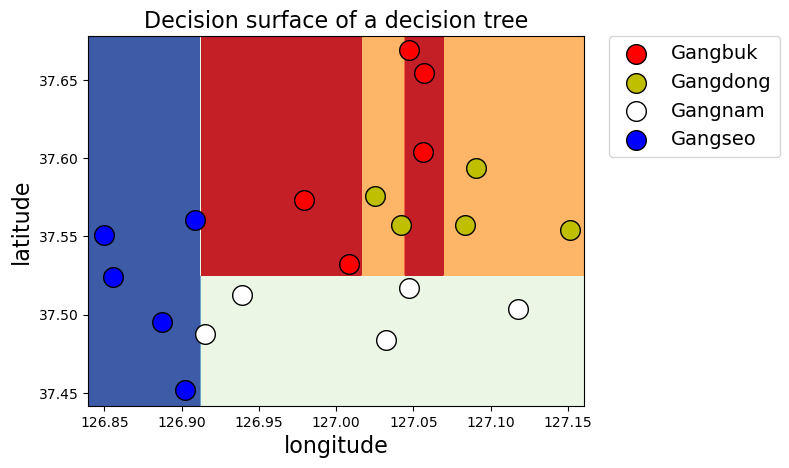

In [18]:
display_decision_surface(clf, X_train, y_encoded)

### 파라미터를 설정한 모델의 결정표면 시각화
- 오버피팅(과대적합)을 피하기 위해 별도의 파라미터를 설정한 의사결정트리의 의사결정표면 차트생성

- max_depth : 트리의 최대 한도 깊이
- min_sample_split : 자식 노드를 갖기 위한 최소한의 데이터 갯수
- mins_sample_leaf : 맨마지막 끝 노드의 최소 데이터 갯수
- random_state : 여러번 실행해도, 파라미터가 같은 경우, 결과가 항상 같게 만들어주는 파라미터

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


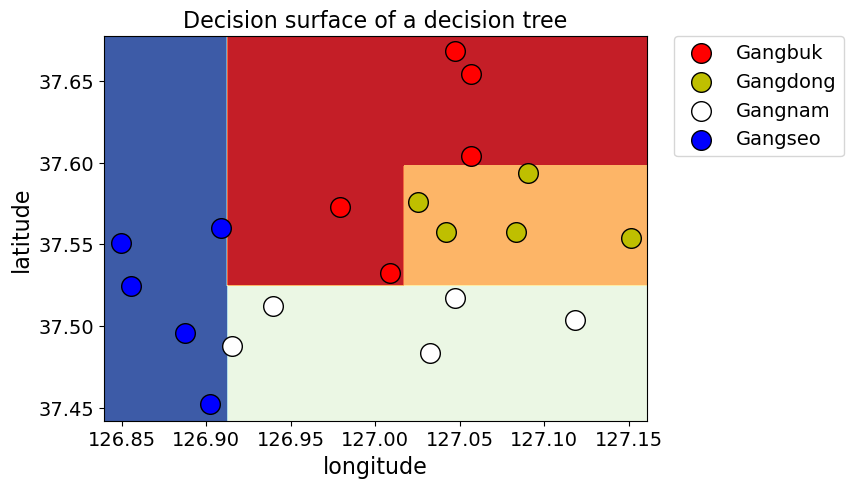

In [19]:
clf = tree.DecisionTreeClassifier(random_state = 70,
                                  max_depth = 4,
                                  min_samples_split = 2,
                                  min_samples_leaf = 2).fit(X_train, y_encoded)
display_decision_surface(clf, X_train, y_encoded)

### 의사결정트리 시각화 
- 의사결정트리의 장점은 예측값이 어떤 식으로 판단이 되어졌는지 이해가 쉽다.(단계별로 보여줌)
- 다른 모델들에 비해, 큰 수학적인 지식이 없어도, 시각화 그림을 보면, 어떨게 예측값이 도출되었는지 쉽게 알 수 있다.

In [20]:
import graphviz

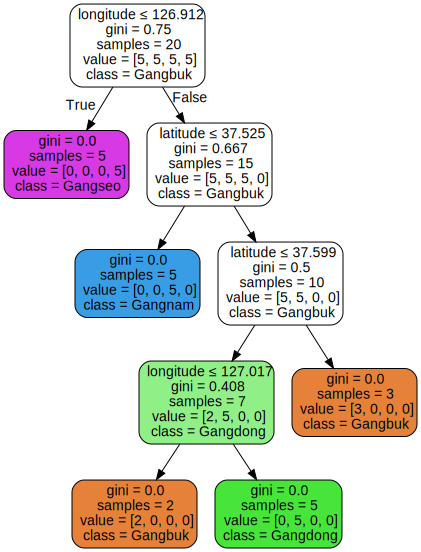

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("seoul")

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['longitude','latitude'],  
                         class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

- **gini** : 불순도 척도, 0일 경우 모든 샘플이 하나의 분류값을 갖으며, 1에 가까울수록 여러 분류값이 한 노드에 존재.

- **samples** : 노드안에 들어온 데이터의 갯수

- **value** : 분류값별 데이터의 갯수

- **class** : 분류값

## 테스트
- 모델을 테스트

In [23]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)

print('accuracy : '+ str(accuracy_score(y_test.values.ravel(), le.classes_[pred])))

accuracy : 1.0


In [24]:
comparison = pd.DataFrame({'prediction': le.classes_[pred], 'tarket':y_test.values.ravel()})
comparison

,prediction,tarket
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam
